In [9]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
import statistics

In [11]:
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [12]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [13]:
## mean

np.mean(df['total_bill'])

19.785942622950824

In [14]:
## Median

np.median(df['total_bill'])

17.795

In [16]:
## Mode
### Numpy dont have mode

statistics.mode(df['total_bill'])

13.42

C:\Users\Chandan Kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_bill'>

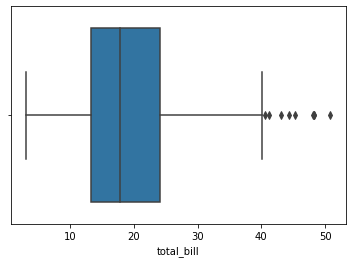

In [18]:
sns.boxplot(df['total_bill'])

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

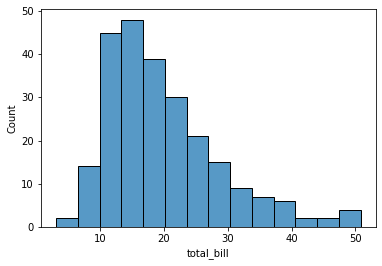

In [19]:
sns.histplot(df['total_bill'])

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

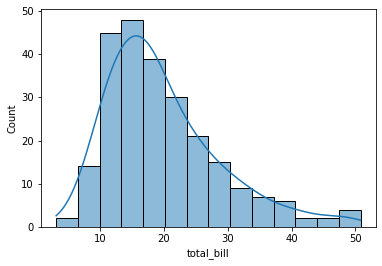

In [20]:
sns.histplot(df['total_bill'], kde = True)

C:\Users\Chandan Kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day', ylabel='count'>

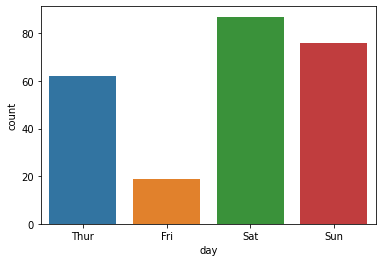

In [21]:
sns.countplot(df['day'])

In [23]:
np.percentile(df['total_bill'], [25, 75])

array([13.3475, 24.1275])

In [26]:
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [27]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [30]:
## outliers
## Define our dataset
dataset= [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107, 10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

<AxesSubplot:ylabel='Count'>

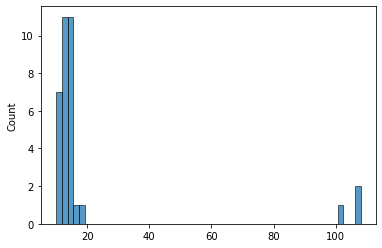

In [31]:
sns.histplot(dataset)

In [32]:
# Outliers can be detected using Zscore, IQR

In [33]:
outliers = []

def detectOutliers(data):
    
    threshold = 3   # 3 SD
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z_score = (i - mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(i)
            
    return outliers

In [34]:
detectOutliers(dataset)

[102, 107, 108]

In [35]:
# outliers using IQR

# 1. Sort the data
# 2. Calculate Q1 and Q3
# 3. IQR (Q1-Q3)
# 4. Lower Fence (Q1 - 1.5*IQR)
# 5. Higher Fence (Q3 + 1.5*IQR)

In [38]:
dataset.sort()
dataset

[10,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 17,
 19,
 102,
 107,
 108]

In [39]:
q1, q3 = np.percentile(dataset, [25, 75])

In [40]:
print(q1, q3)

12.0 15.0


In [42]:
iqr = q3 - q1
iqr

3.0

In [43]:
## Find the lower and upper fence

In [44]:
lower_fence = q1 - 1.5*iqr
higher_fence = q3 + 1.5*iqr

In [45]:
lower_fence

7.5

In [46]:
higher_fence

19.5